## Crimes in Different County Types

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV files used
violence_murder = "Resources/df_crime_sorted_VM.csv"
robbery = "Resources/df_crime_sorted_R.csv"
properties = "Resources/df_crime_sorted_P.csv"
drug = "Resources/df_crime_sorted_D.csv"
sexual = "Resources/df_crime_sorted_S.csv"
overall = "Resources/df_crime_sorted_Total.csv"
classification_file = "Resources/class_county.csv"

# Turning CSV into DataFrames
violence_crime = pd.read_csv(violence_murder)
robbery_crime = pd.read_csv(robbery)
properties_crime = pd.read_csv(properties)
drug_crime = pd.read_csv(drug)
sexual_crime = pd.read_csv(sexual)
overall_crime = pd.read_csv(overall)
classification = pd.read_csv(classification_file)

In [2]:
# Dropping useless columns
violence_crime = violence_crime.drop(columns=["Unnamed: 0"])
robbery_crime = robbery_crime.drop(columns=["Unnamed: 0"])
properties_crime = properties_crime.drop(columns=["Unnamed: 0"])
drug_crime = drug_crime.drop(columns=["Unnamed: 0"])
sexual_crime = sexual_crime.drop(columns=["Unnamed: 0"])
overall_crime = overall_crime.drop(columns=["Unnamed: 0"])
classification = classification.drop(columns=["April 1, 2014 Population (OFM)"])

# Renaming column to be easier to read
classification = classification.rename(index=str, 
                                       columns={"2013 Metropolitan, Micropolitan, Noncore (OMB)": "Classification"})

# Lowercase county column in order to be able to merge
violence_crime["County"] = violence_crime["County"].str.lower()
robbery_crime["County"] = robbery_crime["County"].str.lower()
properties_crime["County"] = properties_crime["County"].str.lower()
drug_crime["County"] = drug_crime["County"].str.lower()
sexual_crime["County"] = sexual_crime["County"].str.lower()
overall_crime["County"] = overall_crime["County"].str.lower()
classification["County"] = classification["County"].str.lower()

In [3]:
# Merging DataFrames so all 6 crime DataFrames contain county classifications
violence_county = pd.merge(violence_crime, classification, how="left", on=["County", "County"])
robbery_county = pd.merge(robbery_crime, classification, how="left", on=["County", "County"])
properties_county = pd.merge(properties_crime, classification, how="left", on=["County", "County"])
drug_county = pd.merge(drug_crime, classification, how="left", on=["County", "County"])
sexual_county = pd.merge(sexual_crime, classification, how="left", on=["County", "County"])
overall_county = pd.merge(overall_crime, classification, how="left", on=["County", "County"])

In [4]:
# Listing out the columns needed for graphs
columns = ["Year", "County", "Total Population", "Total Crime", "Classification"]

In [5]:
# Creating new DataFrames with only those 6 columns
violence = violence_county.loc[:, columns]
robbery = robbery_county.loc[:, columns]
properties = properties_county.loc[:, columns]
drug = drug_county.loc[:, columns]
sexual = sexual_county.loc[:, columns]
overall = overall_county.loc[:, columns]

In [6]:
# Adding a new column to figure out which DataFrame the row came from
violence["Orig_DF"] = "Violence + Murder"
robbery["Orig_DF"] = "Robbery"
properties["Orig_DF"] = "Properties"
drug["Orig_DF"] = "Drug"
sexual["Orig_DF"] = "Sexual"
overall["Orig_DF"] = "Overall"

# Adding the column to the list of "columns"
columns.append("Orig_DF")

In [7]:
# Combining DataFrames into 1
data = [robbery, properties, drug, sexual, overall]

total_df = violence.append(data)

# Saving DataFrame to CSV
total_df.to_csv("Resources/total_df.csv")

## Crimes in Urban Areas

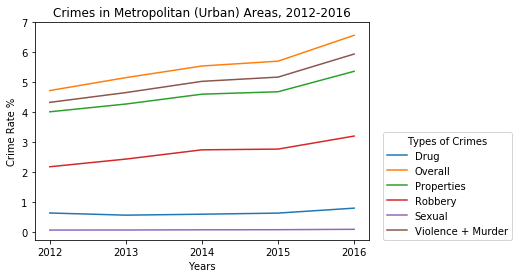

In [8]:
# Creating graph for Metropolitan (Urban) crimes 
metro_df = total_df[total_df["Classification"] == "Metropolitan"]
metro_rate = (metro_df.groupby(["Year", "Orig_DF"])["Total Crime"].sum() / 
              metro_df.groupby(["Year", "Orig_DF"])["Total Population"].sum())*100
         
metro_rate.unstack().plot(kind = "line")
plt.xticks(range(2012, 2017, 1))
plt.yticks(range(0, 8, 1))
plt.legend(title = "Types of Crimes", loc=(1.04,0))
plt.title("Crimes in Metropolitan (Urban) Areas, 2012-2016")
plt.xlabel("Years")
plt.ylabel("Crime Rate %")

plt.savefig("PNG/metro_crimes.png", bbox_inches="tight")

## Crimes in Suburban Areas

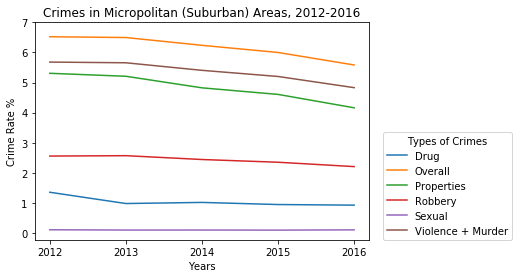

In [9]:
# Creating graph for Micropolitan (Suburban) crimes
micro_df = total_df[total_df["Classification"] == "Micropolitan"]
micro_rate = (micro_df.groupby(["Year", "Orig_DF"])["Total Crime"].sum() / 
              micro_df.groupby(["Year", "Orig_DF"])["Total Population"].sum())*100
         
micro_rate.unstack().plot(kind = "line")
plt.xticks(range(2012, 2017, 1))
plt.yticks(range(0, 8, 1))
plt.legend(title = "Types of Crimes", loc=(1.04,0))
plt.title("Crimes in Micropolitan (Suburban) Areas, 2012-2016")
plt.xlabel("Years")
plt.ylabel("Crime Rate %")

plt.savefig("PNG/micro_crimes.png", bbox_inches="tight")

## Crimes in Rural Areas

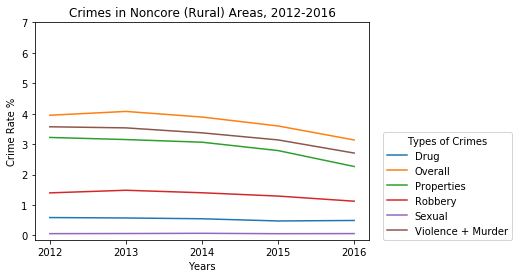

In [10]:
# Creating graph for Noncore (Rural) crimes
noncore_df = total_df[total_df["Classification"] == "Noncore"]
noncore_rate = (noncore_df.groupby(["Year", "Orig_DF"])["Total Crime"].sum() / 
              noncore_df.groupby(["Year", "Orig_DF"])["Total Population"].sum())*100
         
noncore_rate.unstack().plot(kind = "line")
plt.xticks(range(2012, 2017, 1))
plt.yticks(range(0, 8, 1))
plt.legend(title = "Types of Crimes", loc=(1.04,0))
plt.title("Crimes in Noncore (Rural) Areas, 2012-2016")
plt.xlabel("Years")
plt.ylabel("Crime Rate %")

plt.savefig("PNG/noncore_crimes.png", bbox_inches="tight")